In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Functions

A typical python function should be defined in following manner,

```python
def function_name(arg,*args,kws=...):
    '''docstrings'''
    # code goes here
    return return_value
```

and the arguments are mainly devided by:
- required arguments
- variable-length arguments
- default/keyword arguments

**All the positional arguments go first and are followed by the default arguments.**

In [2]:
def circlelength(r):
    '''calculate the perimeter of circle with given radius.'''
    pi=3.14
    return pi*r**2

In [3]:
print(circlelength.__doc__)

calculate the perimeter of circle with given radius.


A good docstrings should involved: **explanation**,**parameters**,**returnvalues**,**notes**,**examples** and so on like [legendre in numpy](https://github.com/numpy/numpy/blob/main/numpy/polynomial/legendre.py)

In [4]:
circlelength(2)

12.56

In [5]:
def circlelength(r,pi=3.14):
    return pi*r**2

In [6]:
circlelength(2,pi=3.1415)

12.566

In [7]:
def circleslength(*rs):
    pi=3.14
    for r in rs:
        print(pi*r**2)

In [8]:
circleslength(1,2,3,4)

3.14
12.56
28.26
50.24


You can find many examples from source code, like [matplotlib.pyplot](https://github.com/matplotlib/matplotlib/blob/main/lib/matplotlib/pyplot.py).

```python
# Autogenerated by boilerplate.py.  Do not edit as changes will be lost.
@_copy_docstring_and_deprecators(Axes.plot)
def plot(*args, scalex=True, scaley=True, data=None, **kwargs):
    return gca().plot(
        *args, scalex=scalex, scaley=scaley,
        **({"data": data} if data is not None else {}), **kwargs)
```

In [9]:
x_arr=np.linspace(0,10,100)
y_arr=np.cos(x_arr)

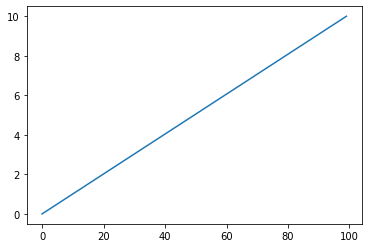

In [10]:
plt.plot(x_arr)

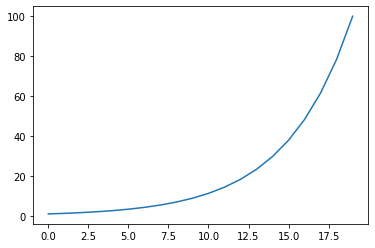

In [11]:
plt.plot(np.logspace(0,2,20))

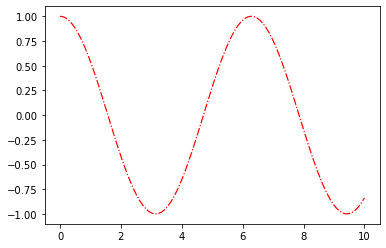

In [12]:
plt.plot(x_arr,y_arr,linestyle='-.',color='r',linewidth=1.2)

another frequently-used function is **lambda** function,
```python
lambda args:return_vale
```

which helps to write **concise** functions and put it anywhere!

In [13]:
circlelength=lambda r,pi=3.14:pi*r**2

In [14]:
print(circlelength(2))
print(circlelength(2,pi=3.1415))

12.56
12.566


## decorator
it shoule be noted that the function in python can be assigned to an variable or passed to another function as a parameter.

another another frequently-used function is **decorator**(see [Decorators in Python](https://www.geeksforgeeks.org/decorators-in-python/) for detail), its syntax is like:
```python
def decorator_func(func):
    def inner_func():
        #code goes here with func parameter
    return inner_func
    
@decorator_func
def used_func():
    //codes goes here
# the above code is equivalent to:
# def used_func():
#     //codes goes here
# used_func=decorator_func(used_func)
```
If the used function contains paramters, the syntax should be like:
```python
def decorator_func(func):
    def inner_func(*args):
        #code goes here with func parameter func(args)
    return inner_func
    
@decorator_func
def used_func(*args):
    //codes goes here
```

let us write a refresh function ``circlelength`` with decorator which will print the radius first!

In [15]:
def declarecircleradius(func):
    def inner(args):
        print("The radius is :{:.2f}".format(args))
        return func(args)
    return inner

In [16]:
@declarecircleradius
def circlelength_decorated(r):
    pi=3.14
    return pi*r**2

In [17]:
print("The perimeter is {:.2f}".format(circlelength_decorated(1.5)))

The radius is :1.50
The perimeter is 7.07


**The decorator can also be chained, see [Decorators in Python](https://www.geeksforgeeks.org/decorators-in-python/)**

# Errors handling 

Sometimes, our function are limited(not robust for all possible arguments like ``circlelength``). An institutive solution is adding testing for the arguments using ``assert`` and so on.

In [18]:
def circlelength(r):
    assert isinstance(r,float) and r>0, "r should be a positive real number!"
    pi=3.14
    return pi*r**2

In [19]:
circlelength(-1)

AssertionError: r should be a positive real number!

But in most of time, we want the programme to keep going rather stop! And we can use ``try-exception-else`` to handle such [BaseException](https://docs.python.org/3/library/exceptions.html#BaseException) like ``ValueError``, ``TypeError`` and ``ZeroDivisionError``. The hierachy for Exception class in Python is shown below(downloaded from https://w3.cs.jmu.edu/lam2mo/cs240_2014_08/lab05-exceptions.html):
<br></br>
![exception hierachy](../images/exception_hierarchy.png)

In [20]:
math.sqrt(-1)

ValueError: math domain error

In [21]:
def circlelength(r):
    pi=3.14
    try:
        return pi*math.sqrt(r)**4
#     except :# whatever error
    except ValueError:# if you know it is going to be an valueerror
        r=float(input("Oops!The radius is a wrong number!Input another one:"))
        return pi*math.sqrt(r)**4

In [22]:
circlelength(-1.5)

Oops!The radius is a wrong number!Input another one:1.5


7.064999999999998

if you do not know which error it is, ``raise`` it explicitly!

In [23]:
def circlelength(r):
    pi=3.14
    try:
        if r>0:
            return pi*math.sqrt(r)**4
        else:
            raise ZeroDivisionError #you can choose the error raised explicitly, but you'd better choose the right one
    except ZeroDivisionError:
        r=float(input("Oops!The radius is a wrong number!Input another one:"))
        return pi*math.sqrt(r)**4

In [24]:
circlelength(-1.5)

Oops!The radius is a wrong number!Input another one:1.5


7.064999999999998

you can define exception yourself(not restricted but keep simple) like [user-defined-exceptions](https://www.geeksforgeeks.org/user-defined-exceptions-python-examples/?ref=lbp)

In [25]:
class CustomError(Exception): #the CustomError is inherited from Exception
    pass

In [26]:
def circlelength(r):
    pi=3.14
    try:
        if r>0:
            return pi*math.sqrt(r)**4
        else:
            raise CustomError
    except CustomError:
        r=float(input("Oops!The radius is a wrong number!Input another one:"))
        return pi*math.sqrt(r)**4

In [27]:
circlelength(-1)

Oops!The radius is a wrong number!Input another one:1.5


7.064999999999998

use ``finnaly`` to **clean up**(optional but always executed)!

In [28]:
def circlelength(r):
    pi=3.14
    try:
        return pi*math.sqrt(r)**4
    except:
        r=float(input("Oops!The radius is a wrong number!Input another one:"))
        return pi*math.sqrt(r)**4
    finally:
        print("Bye bye!")

In [29]:
circlelength(-1.5)

Oops!The radius is a wrong number!Input another one:1.5
Bye bye!


7.064999999999998

# [Modules](https://docs.python.org/3/tutorial/modules.html)

mainly for **organization** and **namespace**

<br></br>
<img src="../images/modules.png" width="500" height="500" />
<br></br>

to add new *PYTHONPYTH*

In [30]:
import sys
#sys.path.append("..")

# HW

- [Functions](https://www.liaoxuefeng.com/wiki/1016959663602400/1017328525009056)
- [Modules](https://www.liaoxuefeng.com/wiki/1016959663602400/1017454145014176)
- Other materials:
    + [Difference Between Iterator VS Generator](https://www.geeksforgeeks.org/difference-between-iterator-vs-generator/)
    + [递归转换为迭代的通用技术](https://6cdh.github.io/posts/recursion-to-loop/)
    + [如何将递归转化为迭代？](https://www.zhihu.com/question/25852334)